In [15]:
import requests
from IPython import display
from base64 import b64decode
import pandas as pd
import json

API_BASE="http://xdddev.chtc.io/askem_staging/"

# Table search and extraction

In [32]:
url = f"{API_BASE}object?askem_class=Table&contentText=reproduction"
resp = requests.get(url)
data = resp.json()
data

{'success': {'v': 1,
  'data': [{'ASKEM_CLASS': 'Table',
    'properties': {'caption': None,
     'documentID': 'e60025b6-52e8-4956-b97e-4dc814e9b5bc',
     'documentTitle': 'An updated estimation of the risk of transmission of the novel coronavirus (2019-nCov)',
     'contentText': 'Article history: The basic reproduction number of an infectious agent is the average number of infections Received 2 February 2020 one case can generate over the course of the infectious period, in a naïve, uninfected Received in revised form 8 February 2020 population. It is well-known that the estimation of this number may vary due to several Accepted 9 February 2020 methodological issues, including different assumptions and choice of parameters, utilized Available online 11 February 2020 models, used datasets and estimation period. With the spreading of the novel coronavirus Handling Editor: Dr Y. Shao (2019-nCoV) infection, the reproduction number has been found to vary, reflecting the dynamics of tran

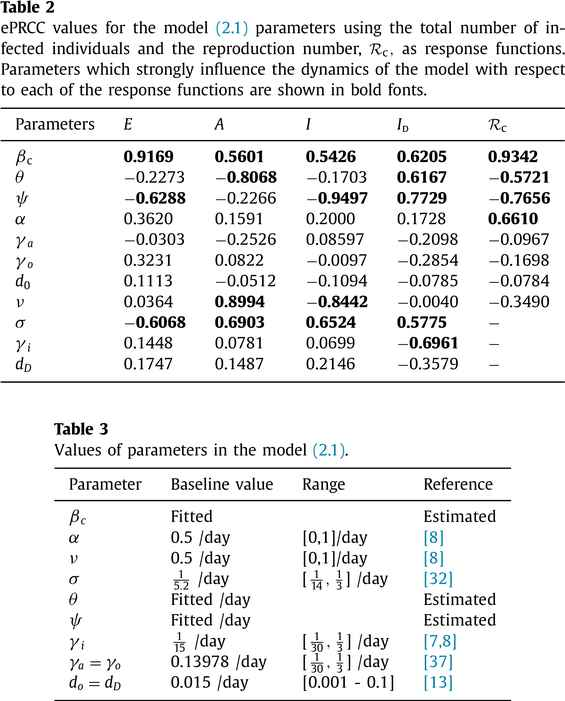

In [47]:
result = data["success"]["data"][5]
display.Image(b64decode(result['properties']['image']))

In [49]:
df = pd.read_json(json.dumps(result['properties']['contentJSON']))
df

'0842faf6-c659-4604-b553-55d8bfbe928d'

In [46]:
url = f"{BASE}/object/0842faf6-c659-4604-b553-55d8bfbe928d"


,0,1,2
0,Table 2,,
1,,ePRCC values for the model (2.1) parameters us...,
2,,fected individuals and the reproduction number...,
3,,Parameters which strongly inﬂuence the dynamic...,
4,to each of the response functions are shown in...,,
5,Parameters \nE \nA,I \nI d,R c
6,β c \n0.9169 \n0.5601,0.5426 \n0.6205,0.9342
7,θ\n−0.2273 \n−0.8068,−0.1703 \n0.6167,−0.5721
8,ψ \n−0.6288 \n−0.2266,−0.9497 \n0.7729,−0.7656
9,α\n0.3620 \n0.1591,0.2000 \n0.1728,0.6610


# Term lookup

# Parameter lookup